In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
house_df = pd.read_csv('./data/Ames_Housing_Price_Data.csv',index_col = 0)
real_estate_df = pd.read_csv('./data/Ames_Real_Estate_Data.csv', index_col = 0, low_memory= False).reset_index()

In [6]:
import pickle

file = open('./pickles/house_latlong.p','rb')

df = pickle.load(file)
real_estate = pickle.load(open('./pickles/real_estate_latlong.p','rb'))

In [10]:
df.Neighborhood.unique()

array(['SWISU', 'Edwards', 'IDOTRR', 'OldTown', 'NWAmes', 'Blmngtn',
       'Mitchel', 'NridgHt', 'NAmes', 'CollgCr', 'SawyerW', 'MeadowV',
       'BrDale', 'Gilbert', 'Timber', 'Somerst', 'BrkSide', 'NoRidge',
       'Sawyer', 'Crawfor', 'Greens', 'ClearCr', 'GrnHill', 'StoneBr',
       'Veenker', 'NPkVill', 'Blueste', 'Landmrk'], dtype=object)

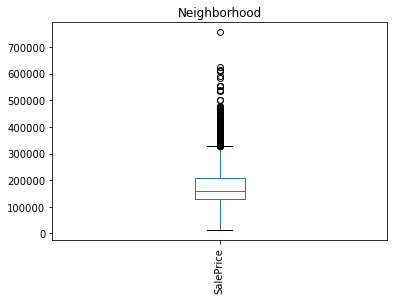

In [13]:
df.plot.box(by = 'Neighborhood', rot = 90, title = 'Neighborhood')

C:\Users\msend\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, '')

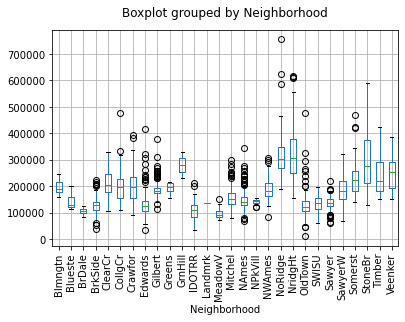

In [22]:
ax = plt.subplot()
df.boxplot(column = 'SalePrice',by = 'Neighborhood',ax =ax, rot = 90, return_type='axes')
ax.set_title('')

In [38]:
real_estate[np.isnan(real_estate['SalePrice'])].latitude.dropna()

13       42.061202
14       42.061202
17       42.061202
18       42.061202
19       42.061202
           ...    
22099    41.988230
22101    41.988231
22102    41.988232
22104    41.989124
22105    41.989039
Name: latitude, Length: 11124, dtype: float64

In [25]:
house_df.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [7]:
real_estate_df.columns

Index(['MapRefNo', 'GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr',
       'ZngCdSc', 'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr',
       'SchD_S', 'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2',
       'MA_City', 'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo',
       'Inst1_No', 'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S',
       'OthAc_S', 'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D',
       'X2TSc_D', 'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S',
       'ImpAcX1S', 'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S',
       'AcreX_S1', 'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType',
       'BldgNo_S', 'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle',
       'Foundation', 'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating',
       'Central Air', 'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces',
       'PoolArea', 'GarageType', 'GarYrBlt', 'Cars', 'GarageArea',
       'YrSold_YYYY', 'MoSold_MM', '

In [28]:
real_estate_df.SalePrice.dropna()

43       399000.0
44       365400.0
45        36000.0
46        36000.0
47        36000.0
           ...   
22100    156000.0
22103    159000.0
22106    209000.0
22113    184900.0
22189    280000.0
Name: SalePrice, Length: 2966, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lm_floors = LinearRegression()

In [17]:
lm_floors.fit(house_df[['1stFlrSF','2ndFlrSF']],house_df['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lm_floors.score(house_df[['1stFlrSF','2ndFlrSF']],house_df['SalePrice'])

0.6145407914343354

In [22]:
house_df.Neighborhood.value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Gilbert    143
Somerst    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

### Objective

Business Intelligence for the Home Builder/Flipper: A new home builder/old house remodeler would like to get into building new homes or flipping older houses for profit. Based on your modeling result, provide insights for your client. This is a more difficult question because it is hard to estimate building costs.

Descriptive side:
- Where/when houses sold
- Differences in neighborhoods (groupby ...)
- 

This will feed in to the model below

Predictive side:
- Model predicts house prices based on several factors to indentify houses to buy, improve and sell
    - How much more is a house worth if it was newer?
    - Had a second floor, more area, pool, garage, etc. 

Feature Engineering Ideas:
- knn with lat/long coords as neighborhoods
    need to add lat/long
- unsupervised clustering to look at similar houses, maybe supervised with 
- PCA or linear regression on categories
- Just cut the dataset down and do a quick linear regression
- Neighborhood maps: https://python-visualization.github.io/folium/modules.html
- 
    
More ideas:
- Digging into the fan structure of the grarea/price regression:  
    Hypothesis: added residuals in larger houses is because of more differentiation in features. Real objective is modeling  residuals in that plot. Then we can buy houses on the lower side of the fan and upgrade to the higher and sell at a nice profit. Can also knock down and build a bigger house (might need to look at lot size here!)

### Baseline Linear Regression Model:

Building a linear regression model using a small amount of columns which, from a quick glance should be important. With and without normalizing to be able to judge relative coefficients.


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lm_base = LinearRegression()

house_base = house_df.loc[:,['GrLivArea','SalePrice','LotArea','Street','Neighborhood','Condition1',
                      'HouseStyle','OverallQual','OverallCond','RoofStyle','YearBuilt','YearRemodAdd',
                      'Exterior1st','Foundation','TotalBsmtSF','Fireplaces','GarageArea','PoolArea',
                      'MoSold','YrSold','SaleCondition','SaleType']]

house_base = pd.get_dummies(house_base) #one hot encode
house_base = house_base.drop(['SaleType_WD ','SaleCondition_Abnorml','Foundation_Wood',
                             'Exterior1st_WdShing','Neighborhood_Landmrk','Street_Grvl',
                             'RoofStyle_Shed','HouseStyle_2.5Fin'], axis = 1) #drop some categorical columns
#Think about automating above function

In [67]:
house_base = house_base.drop(913, axis = 0)

In [68]:
house_base.GarageArea[np.isnan(house_base.GarageArea)] = 0 #fix to avoid copying issue

In [72]:
x_train, x_test, y_train, y_test = train_test_split(house_base.drop('SalePrice', axis = 1),house_base['SalePrice'],test_size = .2, random_state = 42)

lm_base.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
lm_base.score(x_train, y_train)

0.8761285655133221

In [74]:
lm_base.score(x_test, y_test)

0.8624379348243185

Not bad! Let's look at coefficents and use the statsmodels package to dive into the statistics. 

In [88]:
pd.Series(dict(zip(list(x_train.columns),lm_base.coef_)))

GrLivArea            52.185337
LotArea               0.631608
OverallQual       12006.800977
OverallCond        7283.749274
YearBuilt           323.102680
                      ...     
SaleType_ConLI    -3969.212208
SaleType_ConLw     7504.764536
SaleType_New     -25992.195864
SaleType_Oth      -9360.846599
SaleType_VWD      -5023.836242
Length: 94, dtype: float64

In [87]:
import statsmodels.api as sm
x = sm.add_constant(x_train)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(y_train, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     149.7
Date:                Tue, 25 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:39:33   Log-Likelihood:                -23945.
No. Observations:                2063   AIC:                         4.808e+04
Df Residuals:                    1969   BIC:                         4.861e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.927e+

Lots of high p values and small eigenvalues, lets drop more columns. Neighborhood,foundation, saletype, salecondition, exterior, housestyle, condition1, street_pave. Make age column and replace yearbuild. Also taking a deeper look at correlations:

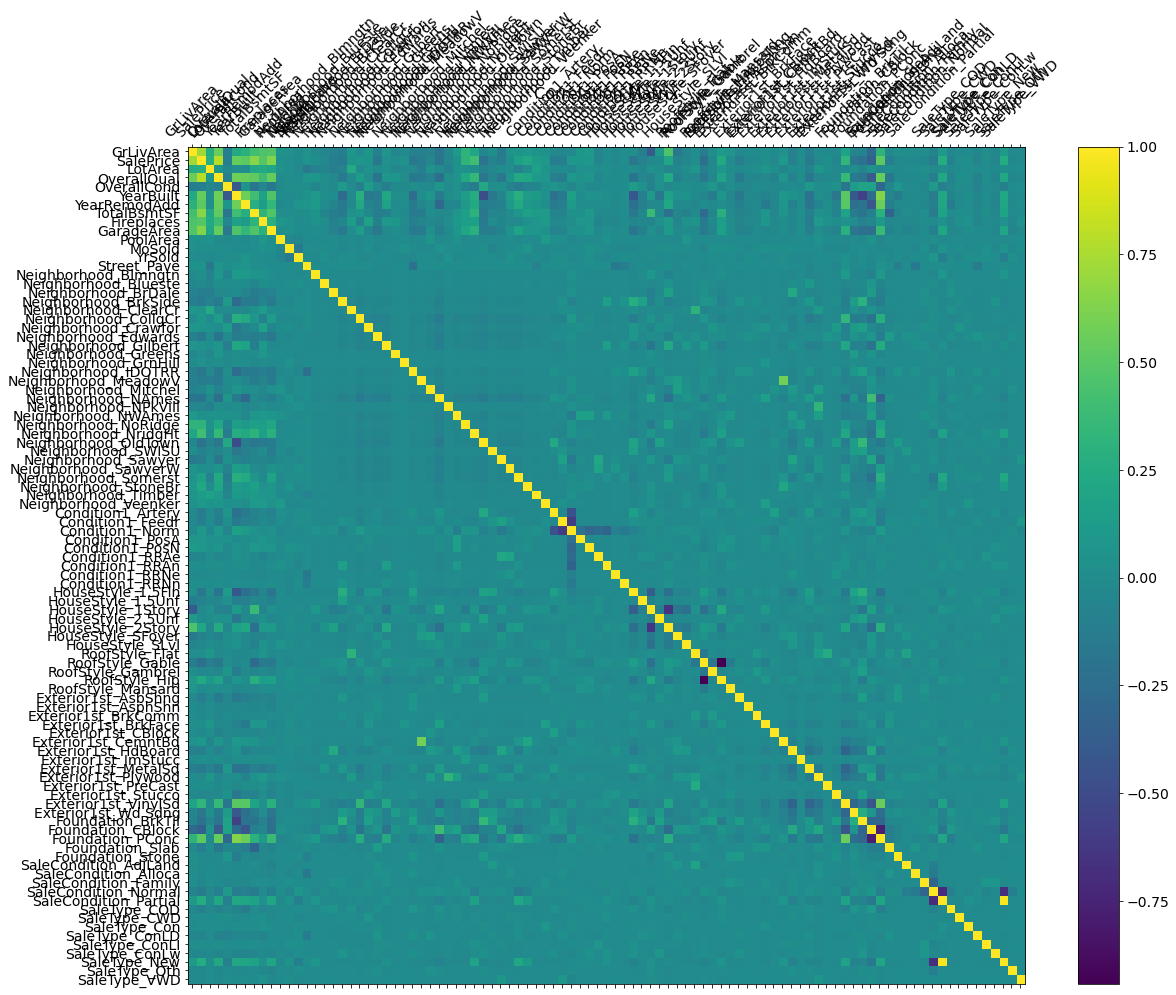

In [91]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(house_base.corr(), fignum=f.number)
plt.xticks(range(house_base.shape[1]), house_base.columns, fontsize=14, rotation=45)
plt.yticks(range(house_base.shape[1]), house_base.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

Not obviously horrible. Most of the bivariate covariance seems to be at the top.  

In [120]:
house_base_reduced = house_df.loc[:,['GrLivArea','SalePrice','LotArea',
                      'OverallQual','OverallCond','RoofStyle','YearBuilt','YearRemodAdd',
                      'TotalBsmtSF','Fireplaces','GarageArea',
                      'MoSold','YrSold']]
house_base_reduced = pd.get_dummies(house_base_reduced)

house_base_reduced['Age'] = house_base_reduced['YrSold'] - house_base_reduced['YearBuilt'] #think about combining into one
house_base_reduced['YrSinceRemod'] =  house_base_reduced['YrSold'] - house_base_reduced['YearRemodAdd']
house_base_reduced = house_base_reduced.drop(['YrSold','YearBuilt','YearRemodAdd'],axis = 1)

In [121]:
house_base_reduced = house_base_reduced.drop(913, axis = 0)
house_base_reduced.GarageArea[np.isnan(house_base_reduced.GarageArea)] = 0 #fix to avoid copying issue

In [122]:
lm_base_reduced = LinearRegression()
xr_train, xr_test, yr_train, yr_test = train_test_split(house_base_reduced.drop('SalePrice', axis = 1),house_base_reduced['SalePrice'],test_size = .2, random_state = 42)


In [123]:
lm_base_reduced.fit(xr_train, yr_train)

print(lm_base_reduced.score(xr_test, yr_test))
print(lm_base_reduced.score(xr_train, yr_train))

0.826719439274574
0.8376321159862207


In [124]:
x = sm.add_constant(xr_train)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(yr_train, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     704.0
Date:                Tue, 25 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:04:56   Log-Likelihood:                -24225.
No. Observations:                2063   AIC:                         4.848e+04
Df Residuals:                    2047   BIC:                         4.857e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5.256e+04   6504.12

Unsurprisingly does a bit worse. Just less features to fit the residuals and still lots of multi collinearity. GrLivArea highly correlated with OverallQual, Fireplaces and GarageArea.

Change month column to nominal potentially. So that it doesn't fit it linearly like it does here.

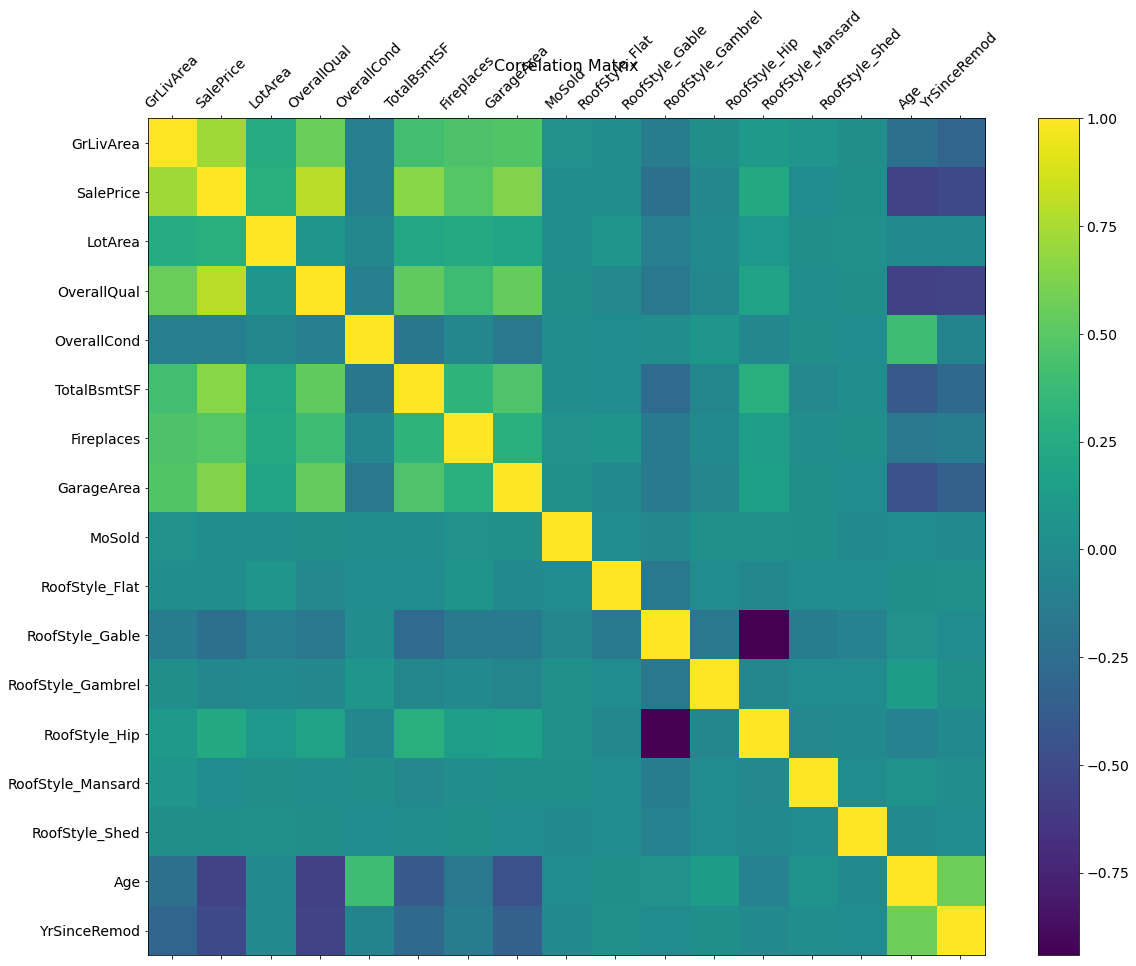

In [125]:
f = plt.figure(figsize=(19, 15))
plt.matshow(house_base_reduced.corr(), fignum=f.number)
plt.xticks(range(house_base_reduced.shape[1]), house_base_reduced.columns, fontsize=14, rotation=45)
plt.yticks(range(house_base_reduced.shape[1]), house_base_reduced.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

### Lat Long Add

Adding lat long coordinates for a neighborhood analysis:

In [8]:
df = house_df.merge(real_estate_df[['MapRefNo','Prop_Addr']],how='left', left_on = 'PID', right_on = 'MapRefNo')

In [29]:
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter

locator = Nominatim(user_agent="myGeocoder")

In [138]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=.05)
locations = [geocode(addr+', Ames, USA') if type(addr)==str else None for addr in df.Prop_Addr]

In [30]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=.05)
locations2 = [geocode(addr+', Ames, USA') if type(addr)==str else None for addr in real_estate_df.Prop_Addr]
latlong = [[x.latitude, x.longitude] if x != None else [None,None] for x in locations2]
real_estate_df['latitude'] = [x.latitude if x != None else None for x in locations2]
real_estate_df['longitude'] = [x.longitude if x != None else None for x in locations2]

real_estate_df.to_pickle('./pickles/real_estate_latlong.p')

RateLimiter caught an error, retrying (0/2 tries). Called with (*('615 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 84, in create_connection
    raise err
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 74, in create_connection
    sock.connect(sa)
socket.timeout: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    httplib_response = self._make_request(
  File "c:\users\msend\appdata\local\programs\python\python38-32\l

RateLimiter swallowed an error after 2 retries. Called with (*('615 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 84, in create_connection
    raise err
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 74, in create_connection
    sock.connect(sa)
socket.timeout: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    httplib_response = self._make_request(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\

RateLimiter caught an error, retrying (1/2 tries). Called with (*('621 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 84, in create_connection
    raise err
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 74, in create_connection
    sock.connect(sa)
socket.timeout: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    httplib_response = self._make_request(
  File "c:\users\msend\appdata\local\programs\python\python38-32\l

RateLimiter caught an error, retrying (0/2 tries). Called with (*('627 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 84, in create_connection
    raise err
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 74, in create_connection
    sock.connect(sa)
socket.timeout: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    httplib_response = self._make_request(
  File "c:\users\msend\appdata\local\programs\python\python38-32\l

RateLimiter swallowed an error after 2 retries. Called with (*('627 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 84, in create_connection
    raise err
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 74, in create_connection
    sock.connect(sa)
socket.timeout: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    httplib_response = self._make_request(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\

RateLimiter caught an error, retrying (1/2 tries). Called with (*('633 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 84, in create_connection
    raise err
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 74, in create_connection
    sock.connect(sa)
socket.timeout: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    httplib_response = self._make_request(
  File "c:\users\msend\appdata\local\programs\python\python38-32\l

RateLimiter caught an error, retrying (0/2 tries). Called with (*('701 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter swallowed an error after 2 retries. Called with (*('701 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    http

RateLimiter caught an error, retrying (1/2 tries). Called with (*('707 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter caught an error, retrying (0/2 tries). Called with (*('713 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter swallowed an error after 2 retries. Called with (*('713 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    http

RateLimiter caught an error, retrying (1/2 tries). Called with (*('719 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter caught an error, retrying (0/2 tries). Called with (*('3703 JEWEL DR REAR, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('3703 JEWEL DR REAR, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('701 KEN MARIL RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('714 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter swallowed an error after 2 retries. Called with (*('714 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    http

RateLimiter caught an error, retrying (1/2 tries). Called with (*('710 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter caught an error, retrying (0/2 tries). Called with (*('706 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter swallowed an error after 2 retries. Called with (*('706 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    http

RateLimiter caught an error, retrying (1/2 tries). Called with (*('702 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter caught an error, retrying (0/2 tries). Called with (*('636 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter swallowed an error after 2 retries. Called with (*('636 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    http

RateLimiter caught an error, retrying (1/2 tries). Called with (*('630 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter caught an error, retrying (0/2 tries). Called with (*('624 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter swallowed an error after 2 retries. Called with (*('624 GARDEN RD, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    http

RateLimiter caught an error, retrying (1/2 tries). Called with (*('6299 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('6101 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('6101 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('701 POTTER AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    

RateLimiter caught an error, retrying (0/2 tries). Called with (*('6215 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('6215 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('6501 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('4098 E 13TH ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    

RateLimiter swallowed an error after 2 retries. Called with (*('4098 E 13TH ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    htt

RateLimiter caught an error, retrying (1/2 tries). Called with (*('3399 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('4199 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('4199 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4399 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('4105 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('4105 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4321 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('4799 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('4799 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('799 TELLER AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    

RateLimiter caught an error, retrying (0/2 tries). Called with (*('4709 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('4709 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('3700 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('500 FLEMING AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter swallowed an error after 2 retries. Called with (*('500 FLEMING AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    ht

RateLimiter caught an error, retrying (1/2 tries). Called with (*('3798 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('1006 S DAYTON PL, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter swallowed an error after 2 retries. Called with (*('1006 S DAYTON PL, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1006 S DAYTON PL REAR, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlop

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1098 S DAYTON PL, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter swallowed an error after 2 retries. Called with (*('1098 S DAYTON PL, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1002 S DAYTON AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('809 PAXTON AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    

RateLimiter swallowed an error after 2 retries. Called with (*('809 PAXTON AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    htt

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2503 BROWNING ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('2506 BROWNING ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter swallowed an error after 2 retries. Called with (*('2506 BROWNING ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2542 BROWNING ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('2605 BROWNING ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter swallowed an error after 2 retries. Called with (*('2605 BROWNING ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2612 BROWNING ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('902 SALK AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    ht

RateLimiter swallowed an error after 2 retries. Called with (*('902 SALK AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    httpl

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1004 S DAYTON PL, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('615 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    

RateLimiter swallowed an error after 2 retries. Called with (*('615 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    htt

RateLimiter caught an error, retrying (1/2 tries). Called with (*('715 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    

RateLimiter caught an error, retrying (0/2 tries). Called with (*('815 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    

RateLimiter swallowed an error after 2 retries. Called with (*('815 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    htt

RateLimiter caught an error, retrying (1/2 tries). Called with (*('915 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1015 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter swallowed an error after 2 retries. Called with (*('1015 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    ht

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1115 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (0/2 tries). Called with (*('2809 WAKEFIELD CIR, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('2809 WAKEFIELD CIR, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2825 WAKEFIELD CIR, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('2824 WAKEFIELD CIR, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('2824 WAKEFIELD CIR, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2810 WAKEFIELD CIR, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('2811 HYATT CIR, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    

RateLimiter swallowed an error after 2 retries. Called with (*('2811 HYATT CIR, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    htt

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2827 HYATT CIR, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    

RateLimiter caught an error, retrying (0/2 tries). Called with (*('2826 HYATT CIR, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    

RateLimiter swallowed an error after 2 retries. Called with (*('2826 HYATT CIR, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    htt

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2812 HYATT CIR, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1208 S DAYTON PL, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter swallowed an error after 2 retries. Called with (*('1208 S DAYTON PL, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1304 S DAYTON PL, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1400 S DAYTON PL, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter swallowed an error after 2 retries. Called with (*('1400 S DAYTON PL, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1418 S DAYTON PL, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1418 S DAYTON PL, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter swallowed an error after 2 retries. Called with (*('1418 S DAYTON PL, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1520 S DAYTON PL, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('2507 SE 16TH ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter swallowed an error after 2 retries. Called with (*('2507 SE 16TH ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    ht

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2601 SE 16TH ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (0/2 tries). Called with (*('2605 SE 16TH ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter swallowed an error after 2 retries. Called with (*('2605 SE 16TH ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    ht

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2629 SE 16TH ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (0/2 tries). Called with (*('2635 SE 16TH ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter swallowed an error after 2 retries. Called with (*('2635 SE 16TH ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    ht

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1523 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1421 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter swallowed an error after 2 retries. Called with (*('1421 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    ht

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1315 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1213 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter swallowed an error after 2 retries. Called with (*('1213 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    ht

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1297 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1524 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter swallowed an error after 2 retries. Called with (*('1524 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    ht

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1318 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1216 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter swallowed an error after 2 retries. Called with (*('1216 S BELL AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    ht

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4400 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('4198 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('4198 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4498 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('4626 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('4626 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4696 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('115 S TELLER AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter swallowed an error after 2 retries. Called with (*('115 S TELLER AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter caught an error, retrying (1/2 tries). Called with (*('207 S TELLER AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('4698 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('4698 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('425 S TELLER AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('5500 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('5500 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('130 S TELLER AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('220 S TELLER AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter swallowed an error after 2 retries. Called with (*('220 S TELLER AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter caught an error, retrying (1/2 tries). Called with (*('5810 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('420 S TELLER AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

RateLimiter swallowed an error after 2 retries. Called with (*('420 S TELLER AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    h

RateLimiter caught an error, retrying (1/2 tries). Called with (*('5898 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('6210 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('6210 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('149 FLEMING AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (0/2 tries). Called with (*('121 FLEMING AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter swallowed an error after 2 retries. Called with (*('121 FLEMING AVE, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    ht

RateLimiter caught an error, retrying (1/2 tries). Called with (*('3300 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('3420 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('3420 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('6196 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter caught an error, retrying (0/2 tries). Called with (*('6198 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('6198 E LINCOLN WAY, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2400 SE 16TH ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (0/2 tries). Called with (*('2500 SE 16TH ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter swallowed an error after 2 retries. Called with (*('2500 SE 16TH ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    ht

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2600 SE 16TH ST, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (0/2 tries). Called with (*('2423 US HIGHWAY 30, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen


RateLimiter swallowed an error after 2 retries. Called with (*('2423 US HIGHWAY 30, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
   

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1820 S DAYTON PL, Ames, USA',), **{}).
Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\msend\appdata\local\programs\python\python38-32\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
  

In [157]:
#have to unpack location lat and long into the df. Then save it!!!
latlong = [[x.latitude, x.longitude] if x != None else [None,None] for x in locations]

In [165]:
df['latitude'] = [x.latitude if x != None else None for x in locations]
df['longitude'] = [x.longitude if x != None else None for x in locations]

In [169]:
df.to_pickle('./pickles/house_latlong.p')